# First Order System in Pyomo

## First-Order Differential Equation with Initial Condition

The following cell implements a solution to a first-order linear model in the form

\begin{align}
\tau\frac{dy}{dt} + y & = K u(t) \\
\end{align}

where $\tau$ and $K$ are model parameters, and $u(t)$ is an external process input.

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 22
  Number of variables: 22
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.8\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.024835824966430664
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Text(0.5,1,'Response of a linear first-order ODE')

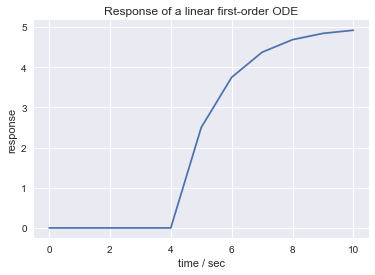

In [52]:
from pyomo.environ import *
from pyomo.dae import *

tf = 10
tau = 1
K = 5

def u(t):
    return 0 if t < 5 else 1

# create a model object
model = ConcreteModel()

# define the independent variable
model.t = ContinuousSet(bounds=(0, tf))

# define the dependent variables
model.y = Var(model.t)
model.dydt = DerivativeVar(model.y)

# define the differential equation as a constraint
model.ode = Constraint(model.t, rule=lambda model, t: tau*model.dydt[t] + model.y[t] == K*u(t))

# define the initial conditions as a constraint
model.ic = Constraint(expr=model.y[0]==0)

# transform dae model to discrete optimization problem
TransformationFactory('dae.finite_difference').apply_to(model)

# solve the model
SolverFactory('ipopt').solve(model).write()

# access the results
t = [t for t in model.y]
y = [model.y[t]() for t in model.y]

% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(t,y)
plt.xlabel('time / sec')
plt.ylabel('response')
plt.title('Response of a linear first-order ODE')